In [8]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import simulate_stock_price
from utils import numpy_sequence_target

Geometric Brownian Motion
$$
S_t = S_0 \exp((\mu - \frac{\sigma^2}{2} ) t + \sigma W_t)
$$

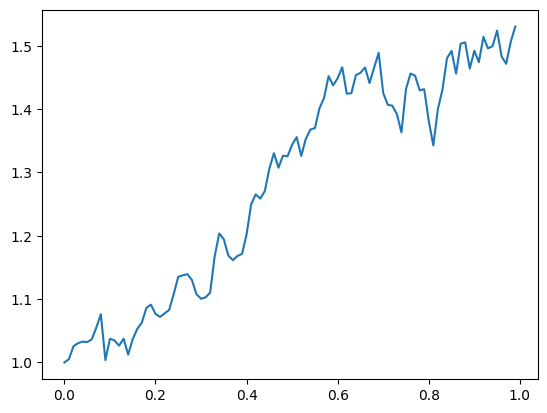

In [9]:
x_axis, gbm_stock = simulate_stock_price(mean= 0.08, sigma = 0.2, t_delta = 0.01, size= 100, S0 = 1)
plt.plot(x_axis, gbm_stock)
plt.show()

In [3]:
X_train, y_train = numpy_sequence_target(gbm_stock, 3)

IndexError: index 100 is out of bounds for axis 0 with size 100

In [14]:
X_train.shape

(97, 3, 1)

In [15]:
y_train.shape

(97,)

In [16]:
X_train[0:6]

array([[[1.        ],
        [0.9815533 ],
        [0.98933814]],

       [[0.9815533 ],
        [0.98933814],
        [0.98506255]],

       [[0.98933814],
        [0.98506255],
        [0.98391845]],

       [[0.98506255],
        [0.98391845],
        [0.97378044]],

       [[0.98391845],
        [0.97378044],
        [1.01715278]],

       [[0.97378044],
        [1.01715278],
        [0.99030921]]])

In [17]:
y_train[0:6]

array([0.98506255, 0.98391845, 0.97378044, 1.01715278, 0.99030921,
       0.9739524 ])

In [16]:
def numpy_sequence_target(time_series : np.array, sequence_length: int) -> tuple[np.array, np.array]:
    sequence = None
    targets = None
    for i in range(0, len(time_series) - sequence_length):
        seq_test = time_series[i:i + sequence_length]
        if seq_test.size == sequence_length:
            seq = np.resize(time_series[i:i + sequence_length], (1, sequence_length, 1))
            if sequence is None:
                sequence = seq
            else:
                sequence = np.vstack((sequence, seq))
                
            targ = time_series[i + sequence_length]
            if targets is None:
                targets = targ
            else:
                targets = np.append(targets, targ)
    return sequence, targets

In [17]:
numpy_sequence_target(np.arange(12), 3)

(array([[[ 0],
         [ 1],
         [ 2]],
 
        [[ 1],
         [ 2],
         [ 3]],
 
        [[ 2],
         [ 3],
         [ 4]],
 
        [[ 3],
         [ 4],
         [ 5]],
 
        [[ 4],
         [ 5],
         [ 6]],
 
        [[ 5],
         [ 6],
         [ 7]],
 
        [[ 6],
         [ 7],
         [ 8]],
 
        [[ 7],
         [ 8],
         [ 9]],
 
        [[ 8],
         [ 9],
         [10]]]),
 array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]))